<h1> Generating & Testing AES Ciphers Blocks Using NIST Randomness Test Suite </h1>

<h2><center> Southern Methodist University: Masters of Data Science </center></h2> 
<h3><center> MSDS 7349: Data and Network Security - Final Project </center></h3>

The folowing code is written with the purpose of randomly generating 128-bit AES ciphertext blocks with 128-bit keys and 128-bit plaintext.  These blocks will then run through various randomness tests in binary string form using the National Institute of Standards and Technology (NIST) Randomness Test Suite.  The inputs will vary throughout the program to test a series of scenarios.  These scenarios include randomly generating keys with a pseudorandom number generator while holding plaintext blocks constant, randomly generating plaintext blocks consistent with english letter frequency while holding keys constant, and randomly generating both keys and plaintext blocks simultaneously.  Ciphertext blocks in each scenario will be tested individually as well as concatenated from the previous ciphertext blocks to test short term and long term randomness.

<h3> Setup </h3>

Loading the packages and functions needed to run the program.

In [1]:
#import the necessary packages and functions
import os
from Crypto.Cipher import AES
from Crypto import Random
import random as rand
import subprocess
import matplotlib.pyplot as plt
import time
%matplotlib inline

A dictionary is created containing each letter in the alphabet that is assigned to a percentage the letter is used in the english language.<sup> [1] </sup>  This is done to minmic the same bias that would be seen in message traffic over the internet in the US.  The percentages were taken to the precision of 0.000 and had to be right sized to intergers through multiplying them by 1000 for code functionality. 

In [2]:
#creating dictionary containing english letter frequencies
pos = {'a':8167, 'b':1492, 'c':2782, 'd':4253, 'e':12702, 'f':2228, 'g':2015, 'h':6094, 'i':6966,
       'j':153, 'k':772, 'l':4025, 'm':2406, 'n':6749, 'o':7507, 'p':1929, 'q':95, 'r':5987,
       's':6327, 't':9056, 'u':2758, 'v':978, 'w':2360, 'x':150, 'y':1974, 'z':74}

<h3> Methods for Study </h3>

<h4> Plaintext Block Generation </h4>

Each plaintext block will be created using a for loop to sample a letter in the dictionary at its appropriate frequency until the desired length of 128-bits is made.<sup>[2]</sup>  This would entail 16 characters assuming each letter is 1 byte (8-bits).  To show the length is 128-bits, we can convert each message to a hexadecimal (base 16 numeric notation) by first encoding it to the standard cp037 english format<sup>[3]</sup>. Afterwards, it is converted into its binary bit string and we take the length of the bit string, showing 128-bits.<sup>[4]</sup> 

In [28]:
#initialize plaintext
plaintext = ""

#run loop to sample 16 letters and append them to plaintext
for i in range(16):
    plaintext += rand.choice([x for x in pos for y in range(pos[x])])

print("plaintext:\n", plaintext)

#convert plaintext to hexadecimal then bit string
plaintext_hex = plaintext.encode('cp037').hex
# plaintext_bit = bin(int(plaintext_hex, 16))[2:]

# print("\nplaintext_hex:\n", plaintext_hex,"\nlength:\n",len(plaintext_hex))
# print("\nplaintext_bit:\n", plaintext_bit,"\nlength:\n",len(plaintext_bit))

('plaintext:\n', 'pnkkheinrannntit')


AttributeError: 'str' object has no attribute 'hex'

In [29]:
print(plaintext)

pnkkheinrannntit


In [39]:
plaintext_hex = plaintext.encode('cp037')

In [40]:
print(plaintext_hex)

����������������


In [38]:
plaintext_bit = bin(plaintext_hex)

TypeError: 'str' object cannot be interpreted as an index

<h4> Key Generation </h4>

Each key will be generated using os.urandom() function, a pseudorandom number generator (PRNG) that uses entropy sources from within a machine's operating system to generate bits that are then outputted in a byte literal format.<sup>[5]</sup>  Again, 16 byte literals are generated to produce 128-bits.  To show the length is 128-bits, we will convert byte literals to a hexadecimal and then into its binary string.  At which point, we will take the length of the bit string.

In [25]:
#generate random key using os.urandom() PRNG
key = os.urandom(16)

print("key:\n", key)

#convert key to hexadecimal then bit string
key_hex = key.hex()
key_bit = bin(int(key_hex, 16))[2:]

print("\nkey_hex:\n", key_hex,"\nlength:\n",len(key_hex))
print("\nkey_bit:\n", key_bit,"\nlength:\n",len(key_bit))

key:
 b'\xec6q\xe3\xe0\xf4\x94\xd1{~\xa4s\xab\xd8\xf8-'

key_hex:
 ec3671e3e0f494d17b7ea473abd8f82d 
length:
 32

key_bit:
 11101100001101100111000111100011111000001111010010010100110100010111101101111110101001000111001110101011110110001111100000101101 
length:
 128


<h4> Ciphertext Block Generation </h4>

PyCrypto is an open source package available for Python which makes use of many common cryptographic ciphers along with many other security related functions.  We will be using the function Cipher.AES() within the PyCrypto package to generate 128-bit ciphertext blocks.<sup>[6]</sup>  This function is consistent with the Advanced Encryption Standard (AES) as noted in FIPS 197.<sup>[7]</sup>  An AES() object will be made using the randomly generated 128-bit key and then will be used to encrypt our 128-bit plaintext blocks into 128-bit ciphertext blocks.  To show the length of the ciphertext is 128-bits, we will convert the byte literal output from our encrypt function to a hexadecimal and then into its binary string.  At which point, we will take the length of the bit string. 

In [26]:
#generate AES cipher object with 128-bit key
cipher = AES.new(key)

#encrypt plaintext with AES cipher object
ciphertext = cipher.encrypt(plaintext)

print("ciphertext:\n", ciphertext)

#convert key to hexadecimal then bit string
ciphertext_hex = ciphertext.hex()
ciphertext_bit = bin(int(ciphertext_hex, 16))[2:]

print("\nkey_hex:\n", ciphertext_hex,"\nlength:\n",len(ciphertext_hex))
print("\nkey_bit:\n", ciphertext_bit,"\nlength:\n",len(ciphertext_bit))

ciphertext:
 b'\xf0\xe5\xe2v\xe9u@v\xe0\x12ve:\xc8-p'

key_hex:
 f0e5e276e9754076e01276653ac82d70 
length:
 32

key_bit:
 11110000111001011110001001110110111010010111010101000000011101101110000000010010011101100110010100111010110010000010110101110000 
length:
 128


<h3> Data Input </h3>

<h4> Plaintext Blocks </h4>

To begin, we will randomly sample 1,000 plaintext blocks using the method listed above.  This is simply the code from before but looped 1,000 times to create a bank of 1,000 plaintext blocks to be used for analysis. 

In [114]:
#initialize list of plaintext blocks
plaintext_bank = [0] * 1000

#loop to generate 1000 plaintext blocks
for i in range(1000): 
    #initialize plaintext
    plaintext = ""

    #run loop to sample 16 letters and append them to plaintext
    for j in range(16):
        plaintext += rand.choice([x for x in pos for y in range(pos[x])])
        
    #assign plaintext block to proper iteration
    plaintext_bank[i] = plaintext
    
    if i == 500:
        print("|=====     | 50% Complete")
print("|==========| 100% Complete")

|=====     | 50% Complete
|==========| 100% Complete
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 15 µs


<h4> Keys </h4>

Next, we randomly generate 1,000 keys as it was done previously in the methods section except it is iterated over 1,000 times.  Again, we are building a bank of 1,000 randomly generated keys to be used for the analysis of this notebook.

In [32]:
#initialize list of keys
key_bank = [0] * 1000

#loop to generate 1000 keys
for i in range(1000):    
    #generate random key using os.urandom() PRNG
    key = os.urandom(16)

    key_bank[i] = key
    
    if i == 500:
        print("|=====     | 50% Complete")
print("|==========| 100% Complete")        

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 21 µs
|=====     | 50% Complete
|==========| 100% Complete


<h3> Data Output: Generating Ciphertext Blocks </h3>

Three separate scenarios will be tested for randomness: variable plaintext blocks with a constant key, variable keys with a constant plaintext block, and variable plaintext blocks with variable keys.  These three test iterations will allow us to individually analyze how each input affects the AES cipher.

<h4> Random Plaintext Blocks, Constant Key </h4>

Ciphertext blocks will be generated by iterating over each plaintext instance from the plaintext_bank we created in the previous section.  During this loop, the first randomly generated key instance from the key_bank will be used to encrypt every plaintext block.  The outputting ciphertext blocks will be stored individually and appended to each other as they are generated in ciphertext_bank list variables.

In [38]:
#generate 1000 ciphertext blocks using 1000 plaintext blocks and 1 key
#save individual blocks and blocks appended to each other as generated

#initialize ciphertext, bank of individual ciphertext blocks and bank of appended ciphertext blocks
ciphertext_bank1 = [0] * 1000
ciphertext_bank2 = [0] * 1000
ciphertext = ""

#generate AES cipher object with 128-bit key
cipher = AES.new(key_bank[0])

#loop to generate 1000 ciphertext blocks
for i in range(1000):
    ciphertext_bank1[i] = bin(int(cipher.encrypt(plaintext_bank[i]).hex(), 16))[2:]
    ciphertext += ciphertext_bank1[i]
    ciphertext_bank2[i] = ciphertext
    
    if i == 500:
        print("|=====     | 50% Complete")
print("|==========| 100% Complete")                

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
|=====     | 50% Complete
|==========| 100% Complete


<h4> Random Keys, Constant Plaintext Block </h4>

Next, ciphertext blocks will be generated by iterating over each key instance from the key_bank we created in the previous section to create separate AES ciphers. During this loop, the first randomly generated plaintext block instance from the plaintext_bank will be encrypted using every AES cipher created with a different key. The outputting ciphertext blocks will be stored individually and appended to each other as they are generated in ciphertext_bank list variables.

In [42]:
#generate 1000 ciphertext blocks using 1 plaintext block and 1000 keys
#save individual blocks and blocks appended to each other as generated

#initialize ciphertext, bank of individual ciphertext blocks and bank of appended ciphertext blocks
ciphertext_bank3 = [0] * 1000
ciphertext_bank4 = [0] * 1000
ciphertext = ""

#loop to generate 1000 ciphertext blocks
for i in range(1000):
    
    #generate AES cipher object with 128-bit key
    cipher = AES.new(key_bank[i])
    
    ciphertext_bank3[i] = bin(int(cipher.encrypt(plaintext_bank[0]).hex(), 16))[2:]
    ciphertext += ciphertext_bank3[i]
    ciphertext_bank4[i] = ciphertext
    
    if i == 500:
        print("|=====     | 50% Complete")
print("|==========| 100% Complete")  

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
|=====     | 50% Complete
|==========| 100% Complete


<h4> Random Plaintext Blocks, Random Keys </h4>

Ciphertext blocks will be generated by iterating over each plaintext instance from the plaintext_bank and every key instance from the key_bank.  Each iteration will take that instance from each bank, essentially linking the two together (i.e. The ith instance of the key_bank will be used to encrypt the ith instance of the plaintext_bank).  The outputting ciphertext blocks will be stored individually and appended to each other as they are generated in ciphertext_bank list variables.

In [44]:
#generate 1000 ciphertext blocks using 1000 plaintext block and 1000 keys
#save individual blocks and blocks appended to each other as generated

#initialize ciphertext, bank of individual ciphertext blocks and bank of appended ciphertext blocks
ciphertext_bank5 = [0] * 1000
ciphertext_bank6 = [0] * 1000
ciphertext = ""

#loop to generate 1000 ciphertext blocks
for i in range(1000):
    
    #generate AES cipher object with 128-bit key
    cipher = AES.new(key_bank[i])
    
    ciphertext_bank5[i] = bin(int(cipher.encrypt(plaintext_bank[i]).hex(), 16))[2:]
    ciphertext += ciphertext_bank5[i]
    ciphertext_bank6[i] = ciphertext
    
    if i == 500:
        print("|=====     | 50% Complete")
print("|==========| 100% Complete") 

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
|=====     | 50% Complete
|==========| 100% Complete


<h3> Analysis: NIST Randomness Test 1 </h3>

Before running the ciphertext output through the NIST Randomness Test Suite, the properly file directory location needs to be set on the machine.  It should be set to where ever the Test Suite folder was saved locally.

In [45]:
#setting directory in command line
os.chdir('/Users/JackNelson/Documents/SMU/MSDS 7349/Project')

<h4> Random Plaintext Blocks, Constant Key </h4>

*Running the Test*

Each ciphertext bit string from the ciphertext banks for the corresponding scenario is concatenated to create the command line operation to execute the first test in the NIST Randomness Test Suite.  The test is run on both the individual bit strings and the appended bit strings.  The results are saved in a list to be graphed and analyzed.

In [47]:
#execute 1000 NIST Randomness Tests on each ciphertext bank
#save the results

#initialize the bank of test results and the lengths of the appended bit strings
ciphertext_bank1_randtest1 = [0] * 1000
ciphertext_bank2_randtest1 = [0] * 1000
length1 = [0] * 1000

#loop to execute 1000 Randomness Tests
for i in range(1000):

    text = "echo " + ciphertext_bank1[i] + " | randomtests/testrandom.py -x -t 1"

    temp = subprocess.check_output(text, shell=True)
    ciphertext_bank1_randtest1[i] = float(temp.decode("utf-8").split("\n")[1])

print("|=====     | 50% Complete")

#loop to execute 1000 Randomness Tests
for j in range(1000):
    
    text2 = "echo " + ciphertext_bank2[j] + " | randomtests/testrandom.py -x -t 1"
    
    temp2 = subprocess.check_output(text2, shell=True)
    ciphertext_bank2_randtest1[j] = float(temp2.decode("utf-8").split("\n")[1])
    
    length1[j] = len(ciphertext_bank2[j])
    
print("|==========| 100% Complete")  

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
|=====     | 50% Complete
|==========| 100% Complete


*Plotting the Results*

The recorded results for each ciphertext bank, both individual blocks and appended blocks, are plotted.  The individual blocks are plotted by iteration and the appended blocks are plotted by the length of bits in each iteration.  Both plots are time series plots.

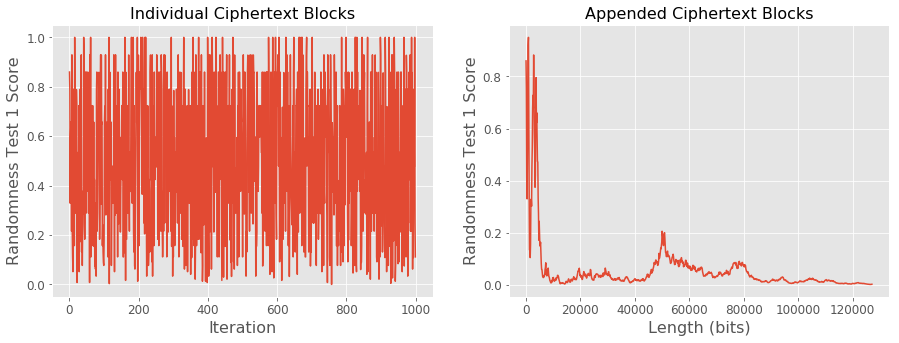

In [108]:
#loading ggplot aesthetics
plt.style.use("ggplot")

#setting figure size of each plot
plt.figure(figsize=(15,5))

#plot individual ciphertext block results in subplot 1
plt.subplot(1,2,1)

ax = plt.plot(ciphertext_bank1_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Randomness Test 1 Score', fontsize=16)
plt.title('Individual Ciphertext Blocks', fontsize=16)

#plot appended ciphertext block results in subplot 2
plt.subplot(1,2,2)

ax = plt.plot(length1, ciphertext_bank2_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel("Length (bits)", size=16)
plt.ylabel("Randomness Test 1 Score", size=16)
plt.title('Appended Ciphertext Blocks', fontsize=16)

The desired results of the first NIST Randomness Test, also known as the frequency test, is 0.  This would mean the amount of 1s and 0s in a bit string are random, or in this case equal.  In the individual ciphertext blocks, the values bounce anywhere from 0 to 1 depending on the iteration but this can still indicate randomness.  There does not appear to be a constant trend.  Furthermore, when the ciphertext block bit strings are appended to eachother, the results of the frequency test go towards 0 as the length in bits gets larger and larger. 

<h4> Constant Plaintext Blocks, Random Keys </h4>

*Running the Test*

As done in the previous scenario, each ciphertext bit string from the ciphertext banks in this scenario are concatenated to create the command line operation to execute the first test in the NIST Randomness Test Suite. The test is run on both the individual bit strings and the appended bit strings. The results are saved in a list to be graphed and analyzed.

In [52]:
#execute 1000 NIST Randomness Tests on each ciphertext bank
#save the results

#initialize the bank of test results and the lengths of the appended bit strings
ciphertext_bank3_randtest1 = [0] * 1000
ciphertext_bank4_randtest1 = [0] * 1000
length2 = [0] * 1000

#loop to execute 1000 Randomness Tests
for i in range(1000):

    text = "echo " + ciphertext_bank3[i] + " | randomtests/testrandom.py -x -t 1"

    temp = subprocess.check_output(text, shell=True)
    ciphertext_bank3_randtest1[i] = float(temp.decode("utf-8").split("\n")[1])

print("|=====     | 50% Complete")
    
#loop to execute 1000 Randomness Tests
for j in range(1000):
    
    text2 = "echo " + ciphertext_bank4[j] + " | randomtests/testrandom.py -x -t 1"
    
    temp2 = subprocess.check_output(text2, shell=True)
    ciphertext_bank4_randtest1[j] = float(temp2.decode("utf-8").split("\n")[1])
    
    length2[j] = len(ciphertext_bank4[j])
    
print("|==========| 100% Complete")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 16.7 µs
|=====     | 50% Complete
|==========| 100% Complete


*Plotting the Results*

The recorded results for each ciphertext bank, both individual blocks and appended blocks, are plotted. The individual blocks are plotted by iteration and the appended blocks are plotted by the length of bits in each iteration. Both plots are time series plots.

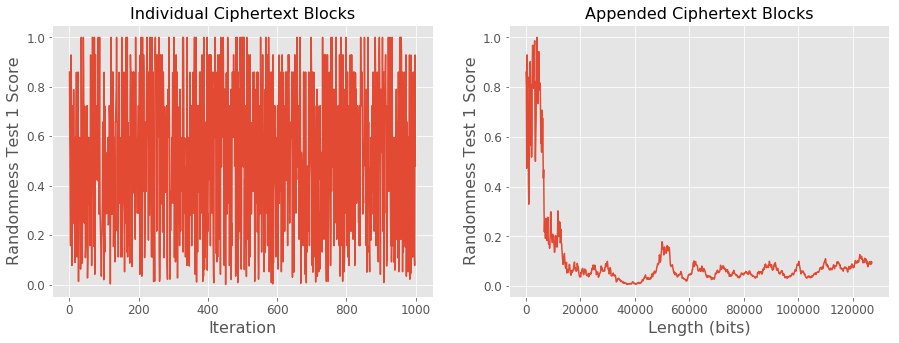

In [110]:
#setting figure size of each plot
plt.figure(figsize=(15,5))

#plot individual ciphertext block results in subplot 1
plt.subplot(1,2,1)

ax = plt.plot(ciphertext_bank3_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Randomness Test 1 Score', fontsize=16)
plt.title('Individual Ciphertext Blocks', fontsize=16)

#plot appended ciphertext block results in subplot 2
plt.subplot(1,2,2)

ax = plt.plot(length1, ciphertext_bank4_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel("Length (bits)", size=16)
plt.ylabel("Randomness Test 1 Score", size=16)
plt.title('Appended Ciphertext Blocks', fontsize=16)

We see a similar result for the constant plaintext blocks and random keys.  However, since we are creating a new AES cipher with each iteration, there appears to be a slight bit a bias in the frequency test.  As the length in bits for the appended ciphertext block bit strings get larger, there is an oscillating effect about 0.1. 

<h4> Random Plaintext Blocks, Random Keys </h4>

*Running the Test*

Now the last scenario is executed, each ciphertext bit string from the ciphertext banks are concatenated to create the command line operation to execute the first test in the NIST Randomness Test Suite. The test is run on both the individual bit strings and the appended bit strings. The results are saved in a list to be graphed and analyzed.

In [54]:
#execute 1000 NIST Randomness Tests on each ciphertext bank
#save the results

#initialize the bank of test results and the lengths of the appended bit strings
ciphertext_bank5_randtest1 = [0] * 1000
ciphertext_bank6_randtest1 = [0] * 1000
length3 = [0] * 1000

#loop to execute 1000 Randomness Tests
for i in range(1000):

    text = "echo " + ciphertext_bank5[i] + " | randomtests/testrandom.py -x -t 1"

    temp = subprocess.check_output(text, shell=True)
    ciphertext_bank5_randtest1[i] = float(temp.decode("utf-8").split("\n")[1])

print("|=====     | 50% Complete")

#loop to execute 1000 Randomness Tests
for j in range(1000):
    
    text2 = "echo " + ciphertext_bank6[j] + " | randomtests/testrandom.py -x -t 1"
    
    temp2 = subprocess.check_output(text2, shell=True)
    ciphertext_bank6_randtest1[j] = float(temp2.decode("utf-8").split("\n")[1])
    
    length3[j] = len(ciphertext_bank4[j])
    
print("|==========| 100% Complete")

|=====     | 50% Complete
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.87 µs
|==========| 100% Complete
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 15 µs


*Plotting the Results*

The recorded results for each ciphertext bank, both individual blocks and appended blocks, are plotted. The individual blocks are plotted by iteration and the appended blocks are plotted by the length of bits in each iteration. Both plots are time series plots.

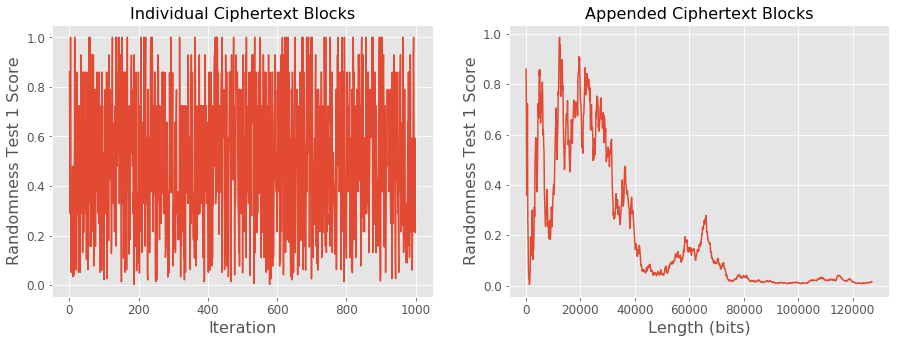

In [111]:
#setting figure size of each plot
plt.figure(figsize=(15,5))

#plot individual ciphertext block results in subplot 1
plt.subplot(1,2,1)

ax = plt.plot(ciphertext_bank5_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Randomness Test 1 Score', fontsize=16)
plt.title('Individual Ciphertext Blocks', fontsize=16)

#plot appended ciphertext block results in subplot 2
plt.subplot(1,2,2)

ax = plt.plot(length1, ciphertext_bank6_randtest1)
plt.tick_params(labelsize=12)
plt.xlabel("Length (bits)", size=16)
plt.ylabel("Randomness Test 1 Score", size=16)
plt.title('Appended Ciphertext Blocks', fontsize=16)

An interesting result takes place when the plaintext blocks and keys change with every iteration.  Since there was a degree of bias when a new cipher was generated, one would expect to see the same condition in this scenario because the same method is used.  However, this degree of bias appears to be generated from the constant plaintext block since it is not observed when the plaintext blocks are variable in this scenario.

<h4> References: </h4>
[1] *https://inventwithpython.com/hacking/chapter20.html* <br />
[2] *https://stackoverflow.com/questions/4113307/pythonic-way-to-select-list-elements-with-different-probability* <br />
[3] *https://docs.python.org/3/library/codecs.html#standard-encodings* <br />
[4] <br />
[5] <br />
[6] <br />
[7] <br />
[8] *https://www.usenix.org/legacy/publications/library/proceedings/sec98/full_papers/gutmann/gutmann.pdf* <br />